## Importing necessary libraries 

In [1]:
import numpy as np #for mathematical manipulation
import pandas as pd #for database manipulation
import matplotlib.pyplot as plt #for plotting
import seaborn as sns #better plotting library
%matplotlib inline

In [2]:
incidents = pd.read_csv('Ultimate_incidents_Buffalo.csv')

In [3]:
incidents.head()

,Response_Minutes,incident_Week,created_Week,created_Month,Incident_Month,created_at_day_of_week,incident_time_day_of_week,lat,long,Response_Seconds,incident_datetime,incident_type_primary,zip,created_at,hour_of_day,neighborhood,police district,council district
0,707,9,9,February,February,Tuesday,Tuesday,42.928,-78.851,42420,2/27/2018 5:30,ROBBERY,14214,2/27/2018 17:17,5,Parkside,District D,MASTEN
1,6001,23,24,June,June,Tuesday,Friday,42.917,-78.899,360060,6/7/2019 0:30,ROBBERY,14213,6/11/2019 4:31,0,Upper West Side,District D,NIAGARA
2,359,34,34,August,August,Friday,Friday,42.924,-78.897,21540,8/23/2019 5:53,ROBBERY,14213,8/23/2019 11:52,5,Upper West Side,District D,NIAGARA
3,551,41,41,October,October,Sunday,Sunday,42.928,-78.896,33060,10/6/2019 3:41,ROBBERY,14213,10/6/2019 12:52,3,Upper West Side,District D,NIAGARA
4,371,26,26,June,June,Wednesday,Tuesday,42.917,-78.898,22260,6/26/2018 20:30,ROBBERY,14213,6/27/2018 2:41,20,Upper West Side,District D,NIAGARA


### Finding unique types  of incidents

In [4]:
incidents['incident_type_primary'].nunique()

12

In [5]:
incidents['incident_type_primary'].value_counts()

LARCENY/THEFT              21177
ASSAULT                     9865
BURGLARY                    6687
UUV                         4803
ROBBERY                     2588
THEFT OF SERVICES            481
SEXUAL ABUSE                 472
RAPE                         389
MURDER                       123
AGGR ASSAULT                  17
CRIM NEGLIGENT HOMICIDE       15
MANSLAUGHTER                   1
Name: incident_type_primary, dtype: int64

### Finding top 10 zip codes based on Incidents

In [6]:
top10_zips =pd.DataFrame(incidents['zip'].value_counts().head(10))
top10_zips.reset_index(inplace=True)
top10_zips.columns=['ZIP','Count']
top10_zips

,ZIP,Count
0,14215,6880
1,14211,5047
2,14213,3784
3,14207,3769
4,14216,3195
5,14206,3010
6,14214,2860
7,14212,2492
8,14201,2221
9,14220,2057


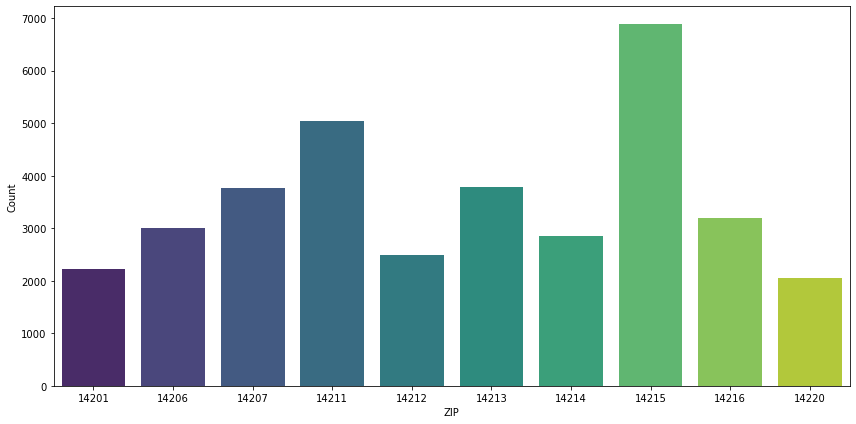

In [7]:
fig_top10 =plt.figure(figsize=(12,6))
sns.barplot(data=top10_zips,x='ZIP',y='Count',palette="viridis")
fig_top10.tight_layout()

### Finding Top 20 Zipcodes

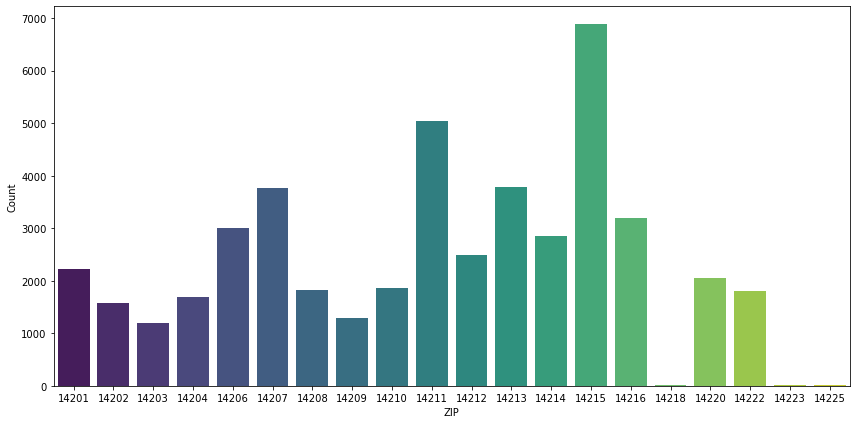

In [8]:
top20_zip=pd.DataFrame(incidents['zip'].value_counts().head(20))
top20_zip.reset_index(inplace=True)
top20_zip.columns=['ZIP','Count']
fig_top20 =plt.figure(figsize=(12,6))
sns.barplot(data=top20_zip,x='ZIP',y='Count',palette="viridis")
fig_top20.tight_layout()

## Top Neighborhoods

In [9]:
top_10_twp=pd.DataFrame(incidents['neighborhood'].value_counts().head(10))
top_10_twp.reset_index(inplace=True)
top_10_twp.columns=['Neighborhood','Count']
top_10_twp

,Neighborhood,Count
0,Broadway Fillmore,2969
1,North Park,2591
2,Kensington-Bailey,2480
3,Genesee-Moselle,2343
4,Lovejoy,1923
5,Central,1909
6,Schiller Park,1873
7,Elmwood Bidwell,1763
8,Upper West Side,1754
9,Elmwood Bryant,1748


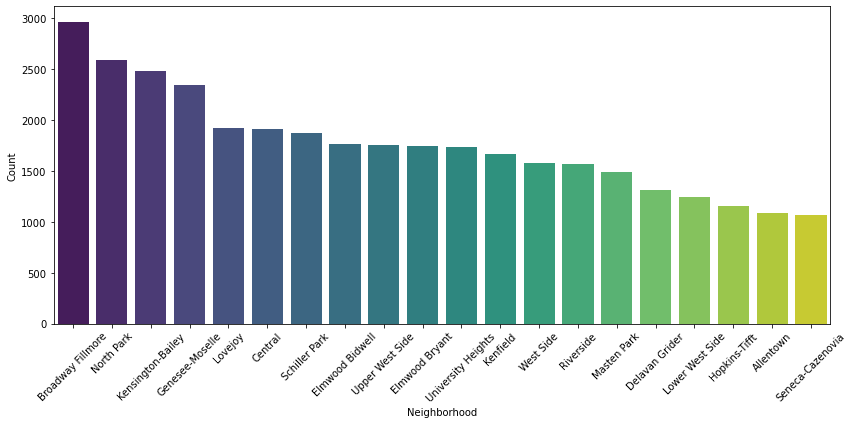

In [10]:


top_20_twp=pd.DataFrame(incidents['neighborhood'].value_counts().head(20))
top_20_twp.reset_index(inplace=True)
top_20_twp.columns=['Neighborhood','Count']
fig2=plt.figure(figsize=(12,6))
g=sns.barplot(data=top_20_twp,x='Neighborhood',y='Count',palette="viridis")
g.set_xticklabels(g.get_xticklabels(),rotation=45)
fig2.tight_layout()



# Geographical Analysis - District level Geographical Clustering

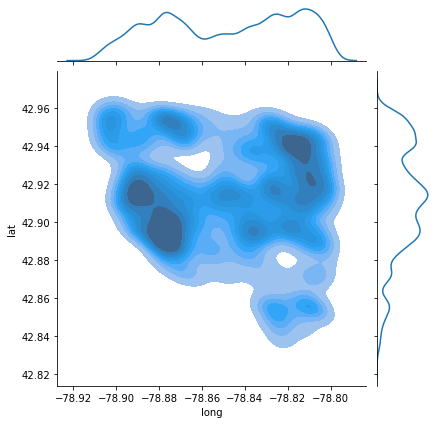

In [14]:
# mapping coordinates using scatter plot
sns.jointplot(data=incidents,x='long',y='lat',kind='kde', shade= True)

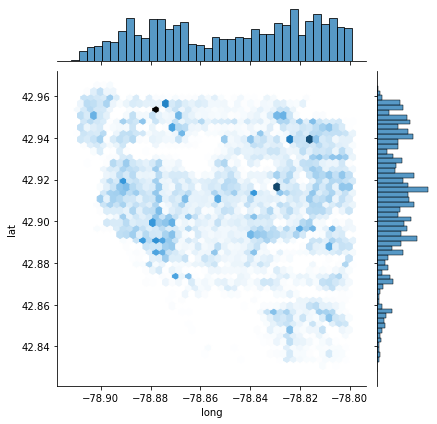

In [15]:
# mapping coordinaes using scatter plot
sns.jointplot(data=incidents,x='long',y='lat',kind='hex')

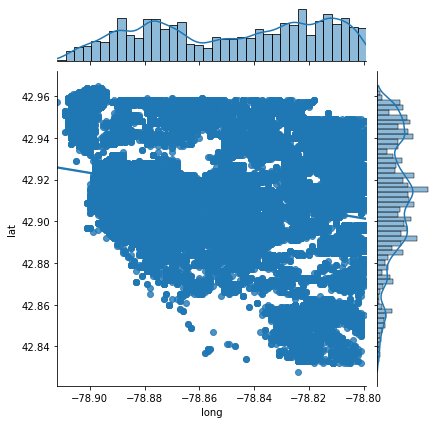

In [18]:
# mapping coordinaes using scatter plot
sns.jointplot(data=incidents,x='long',y='lat',kind='reg')

#### Refining coordinates to ignore outliers that may affect the density clustering

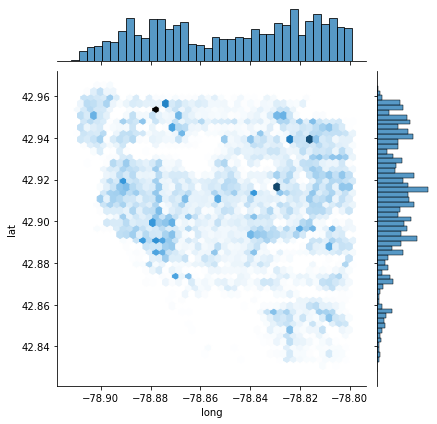

In [19]:


data_geog=incidents[(np.abs(incidents["lat"]-incidents["lat"].mean())<=(4.5*incidents["lat"].std())) & (np.abs(incidents["long"]-incidents["long"].mean())<=(10*incidents["long"].std()))]
data_geog.reset_index().drop('index',axis=1,inplace=True)
sns.jointplot(data=data_geog,x='long',y='lat',kind='hex')



### Density distribution for all incidents

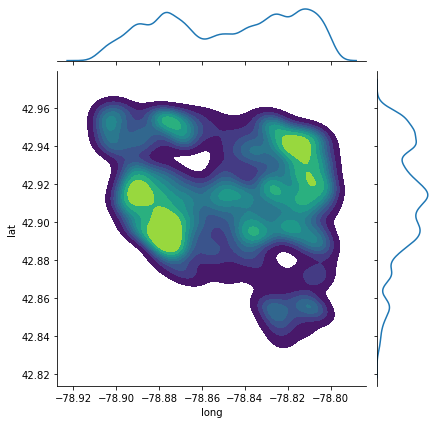

In [22]:
sns.jointplot(data=incidents,x='long',y='lat',kind='kde', cmap='viridis', shade=True)

In [39]:
incident_list = incidents.incident_type_primary.unique()

In [40]:
incident_list

array(['ROBBERY', 'RAPE', 'LARCENY/THEFT', 'THEFT OF SERVICES',
       'BURGLARY', 'ASSAULT', 'MURDER', 'SEXUAL ABUSE', 'UUV',
       'CRIM NEGLIGENT HOMICIDE', 'AGGR ASSAULT', 'MANSLAUGHTER'],
      dtype=object)

In [41]:
incident_list = incident_list.tolist()

In [42]:
import warnings
warnings.filterwarnings("ignore")

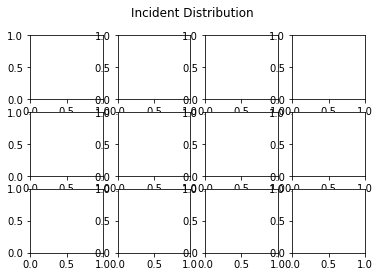

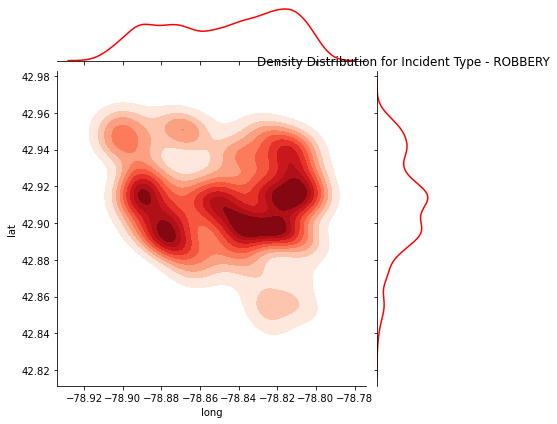

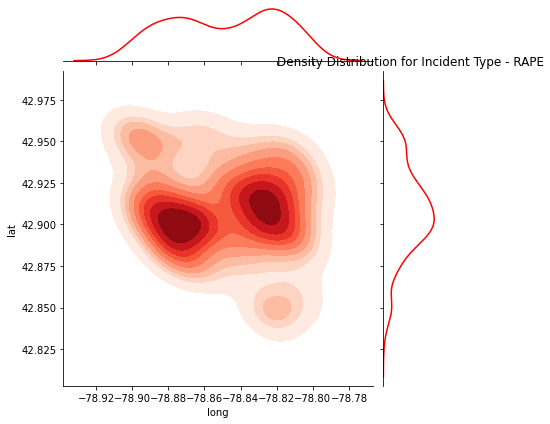

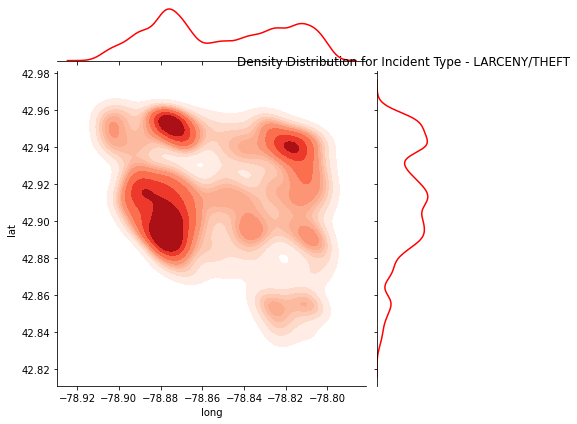

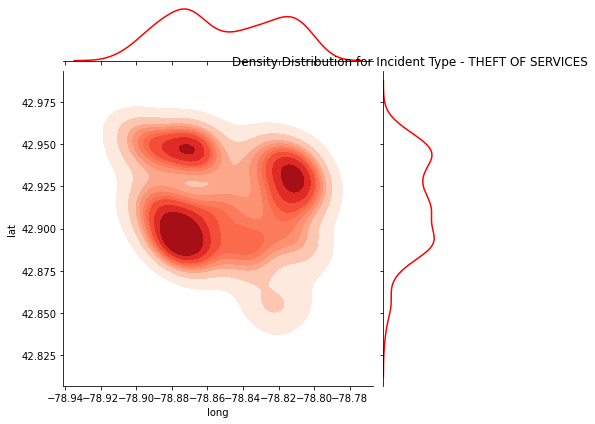

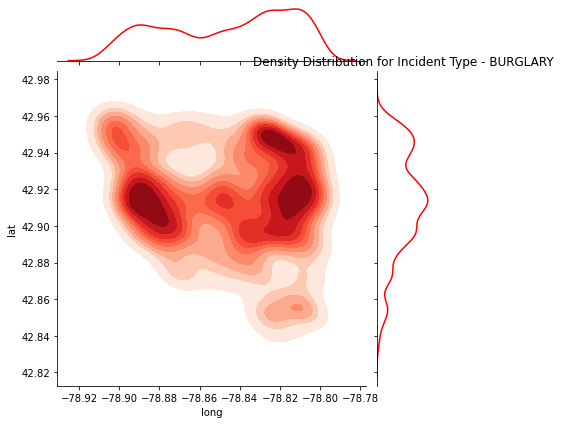

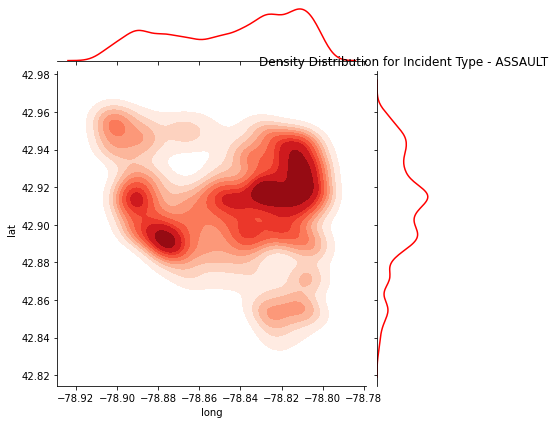

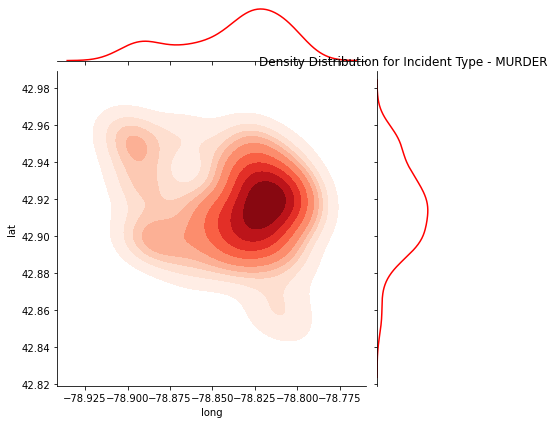

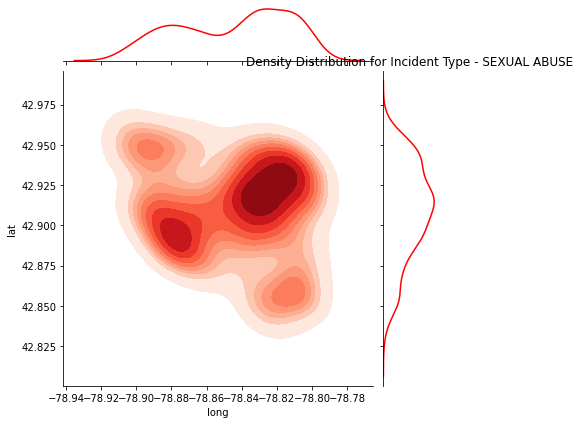

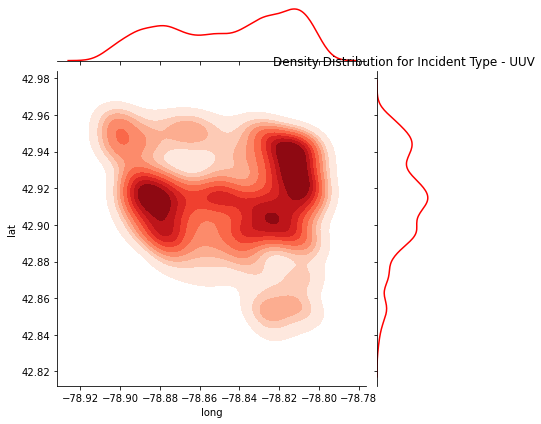

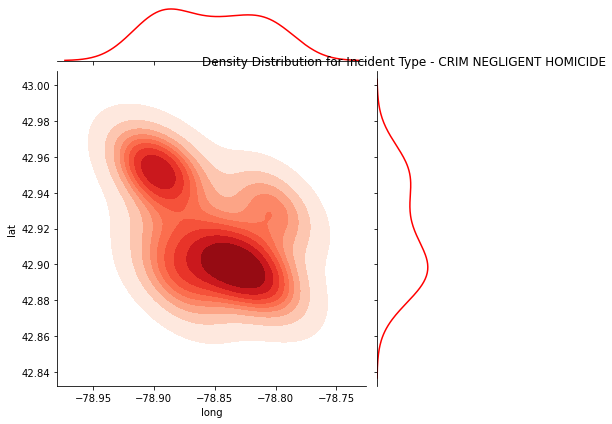

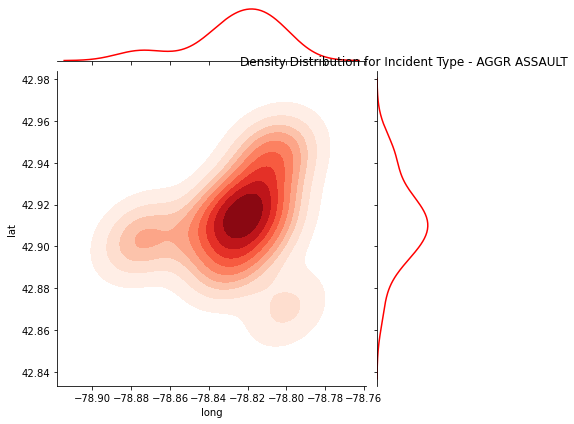

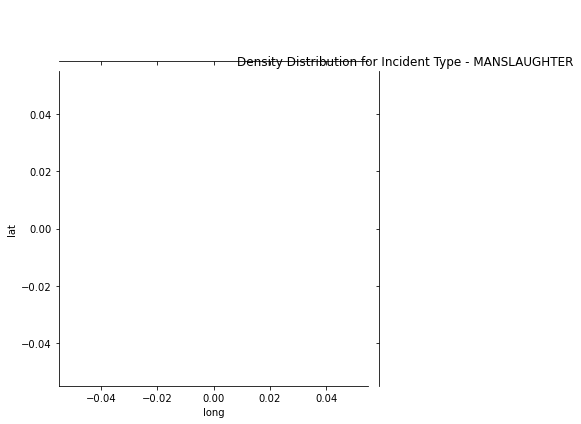

In [37]:
fig, axes = plt.subplots(ncols=4, nrows=3)
fig.suptitle('Incident Distribution')
j = 3
for i,ax in zip(incident_list,axes.flat):
#     fig.add_subplot(4, 3, j-2)
    sns.jointplot(data=incidents[incidents['incident_type_primary']==i],x='long',y='lat',kind='kde',color='red', cmap='Reds', shade=True, ax=ax, hist=False)
    plt.title("Density Distribution for Incident Type - " + i)
#     j+=1

plt.show()

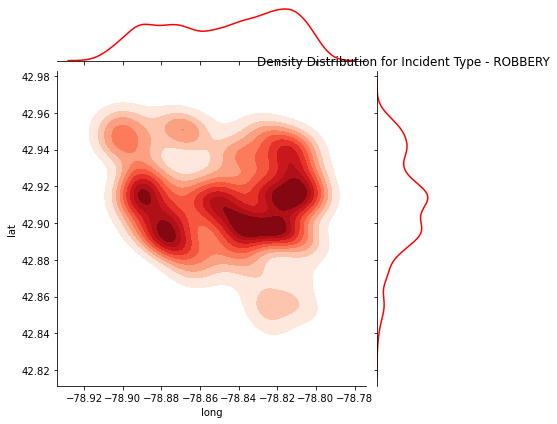

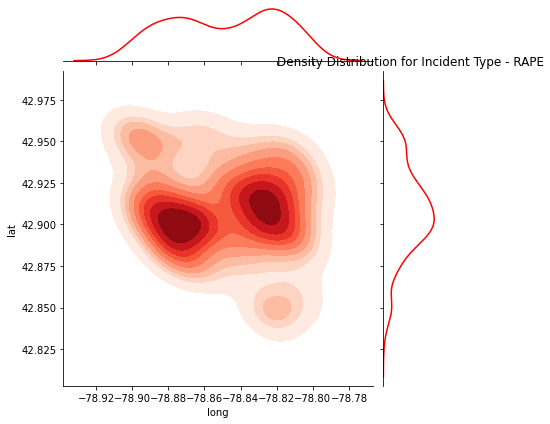

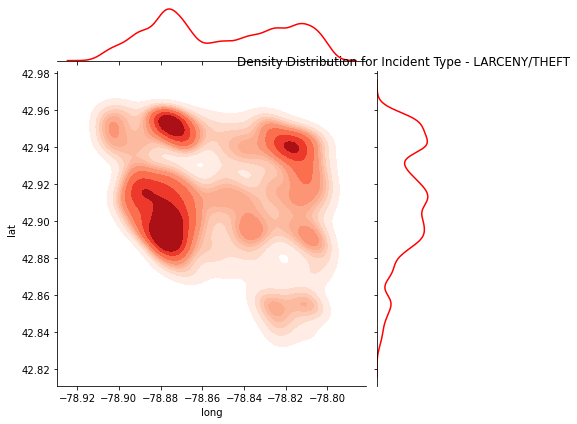

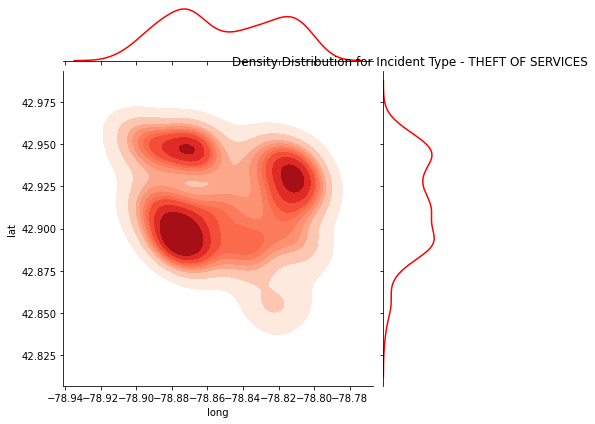

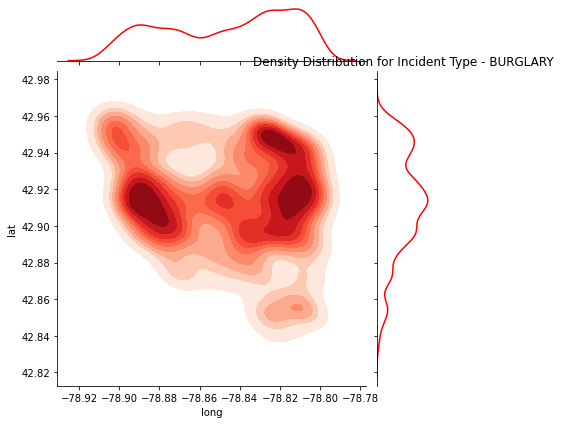

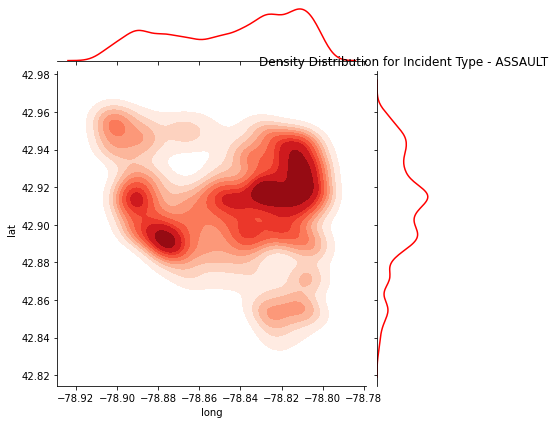

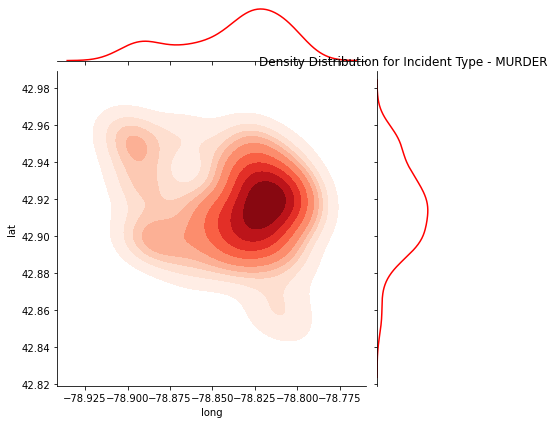

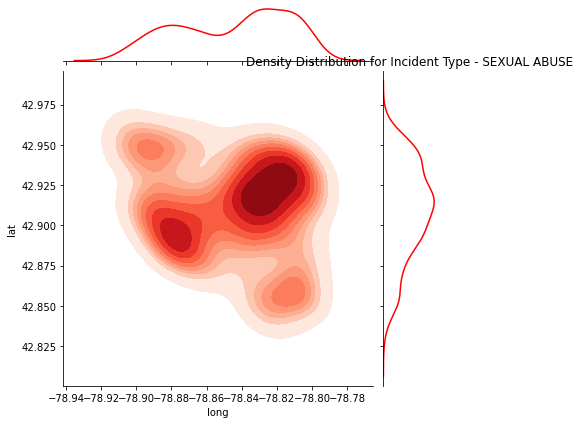

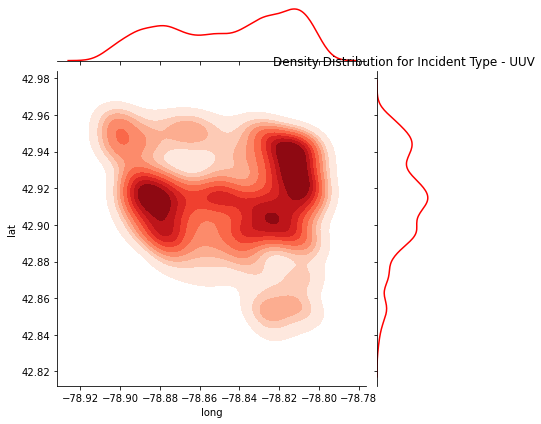

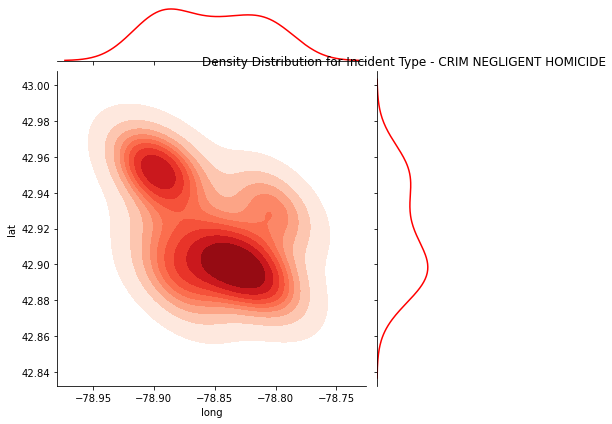

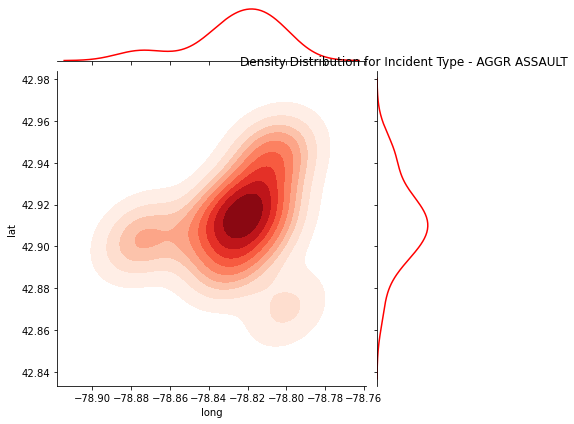

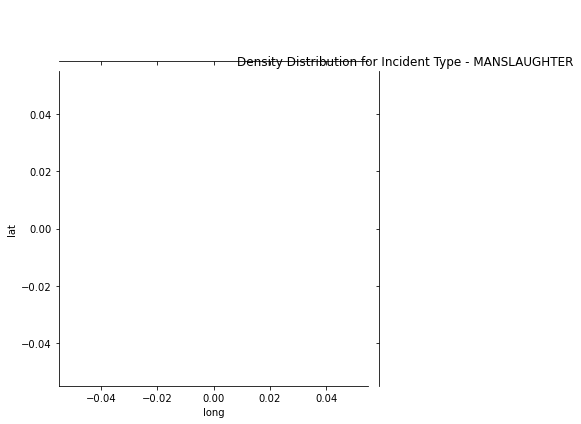

In [38]:
for i in incident_list:
    sns.jointplot(data=incidents[incidents['incident_type_primary']==i],x='long',y='lat',kind='kde',color='red', cmap='Reds', shade=True, ax=ax, hist=False)
    plt.title("Density Distribution for Incident Type - " + i)

plt.show()

### Density distribution for Larceny/ Thefts

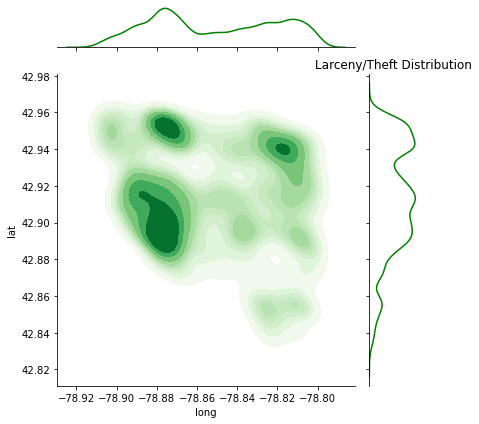

In [57]:
sns.jointplot(data=incidents[incidents['incident_type_primary']=='LARCENY/THEFT'],x='long',y='lat',kind='kde',color='green', cmap='Greens', shade=True)
plt.title('Larceny/Theft Distribution')
plt.tight_layout()

### Density distribution for Assaults

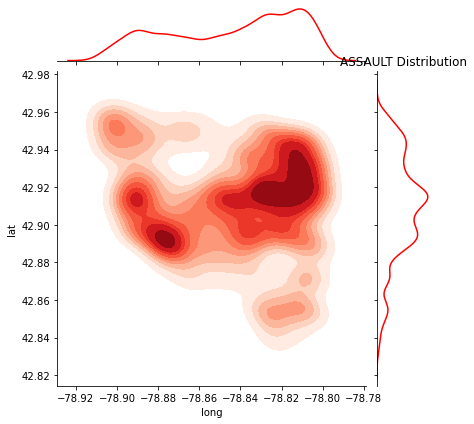

In [55]:
sns.jointplot(data=incidents[incidents['incident_type_primary']=='ASSAULT'],x='long',y='lat',kind='kde',color='red', cmap='Reds', shade= True)
plt.title('ASSAULT Distribution')
plt.show()

### Density distribution for Vehicle Thefts or related incidents

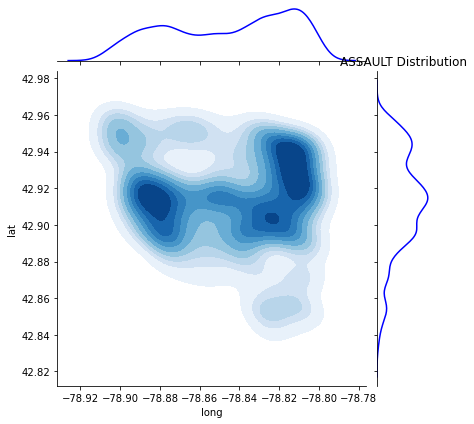

In [60]:
sns.jointplot(data=incidents[incidents['incident_type_primary']=='UUV'],x='long',y='lat',kind='kde',color='blue', cmap='Blues', shade=True)
plt.title('ASSAULT Distribution')
plt.show()

### Density distribution for Sexual Abuse cases

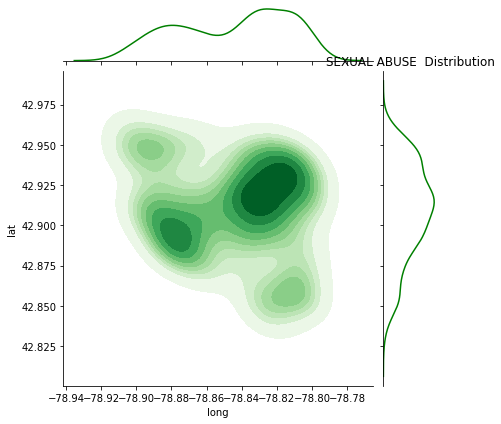

In [61]:
sns.jointplot(data=incidents[incidents['incident_type_primary']=='SEXUAL ABUSE'],x='long',y='lat',kind='kde',color='green', cmap='Greens', shade=True)
plt.title('SEXUAL ABUSE  Distribution')
plt.show()


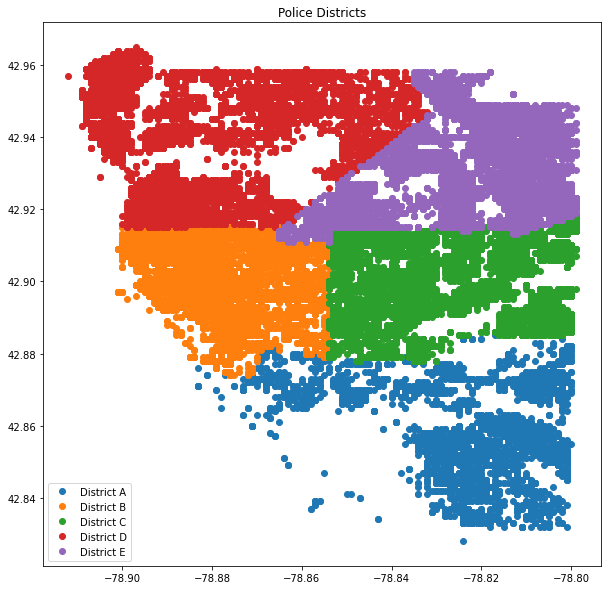

In [95]:
fig=plt.figure(figsize=(10,10))
twp_group=incidents.groupby('police district')
for name, group in twp_group:
    plt.plot(group.long, group.lat, marker='o', linestyle='', label=name)
plt.title("Police Districts")
plt.legend()

## K-means Clustering

Grouping data by similar characters/features and 
check if city planning based on state is appropriate
We use k-means clustering and group it to 7 clusters

In [44]:
from sklearn.cluster import KMeans

In [155]:
pd.options.mode.chained_assignment = None #Remove Error Message
x_mean=incidents['long'].mean()
y_mean=incidents['lat'].mean()
incidents['x']=incidents['long'].map(lambda v:v-x_mean)
incidents['y']=incidents['lat'].map(lambda v:v-y_mean)

In [156]:
# Train Data

train=incidents[['x','y']].reset_index().drop('index',axis=1)

In [157]:
train.head()

,x,y
0,-0.00256,0.016026
1,-0.05056,0.005026
2,-0.04856,0.012026
3,-0.04756,0.016026
4,-0.04956,0.005026


In [158]:
incidents.head()

,Response_Minutes,incident_Week,created_Week,created_Month,Incident_Month,created_at_day_of_week,incident_time_day_of_week,lat,long,Response_Seconds,incident_datetime,incident_type_primary,zip,created_at,hour_of_day,neighborhood,police district,council district,x,y
0,707,9,9,February,February,Tuesday,Tuesday,42.928,-78.851,42420,2/27/2018 5:30,ROBBERY,14214,2/27/2018 17:17,5,Parkside,District D,MASTEN,-0.00256,0.016026
1,6001,23,24,June,June,Tuesday,Friday,42.917,-78.899,360060,6/7/2019 0:30,ROBBERY,14213,6/11/2019 4:31,0,Upper West Side,District D,NIAGARA,-0.05056,0.005026
2,359,34,34,August,August,Friday,Friday,42.924,-78.897,21540,8/23/2019 5:53,ROBBERY,14213,8/23/2019 11:52,5,Upper West Side,District D,NIAGARA,-0.04856,0.012026
3,551,41,41,October,October,Sunday,Sunday,42.928,-78.896,33060,10/6/2019 3:41,ROBBERY,14213,10/6/2019 12:52,3,Upper West Side,District D,NIAGARA,-0.04756,0.016026
4,371,26,26,June,June,Wednesday,Tuesday,42.917,-78.898,22260,6/26/2018 20:30,ROBBERY,14213,6/27/2018 2:41,20,Upper West Side,District D,NIAGARA,-0.04956,0.005026


In [159]:
city_clusters = KMeans(n_clusters=9)
city_clusters.fit(train)

KMeans(n_clusters=9)

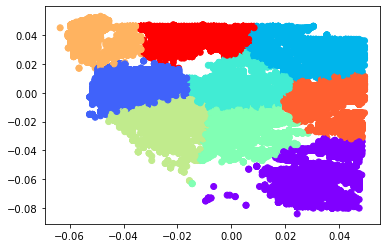

In [161]:
plt.scatter(train['x'], train['y'], c=city_clusters.labels_, cmap='rainbow')

We test our model on different no. of clusters to see if the district distribution is ideal.

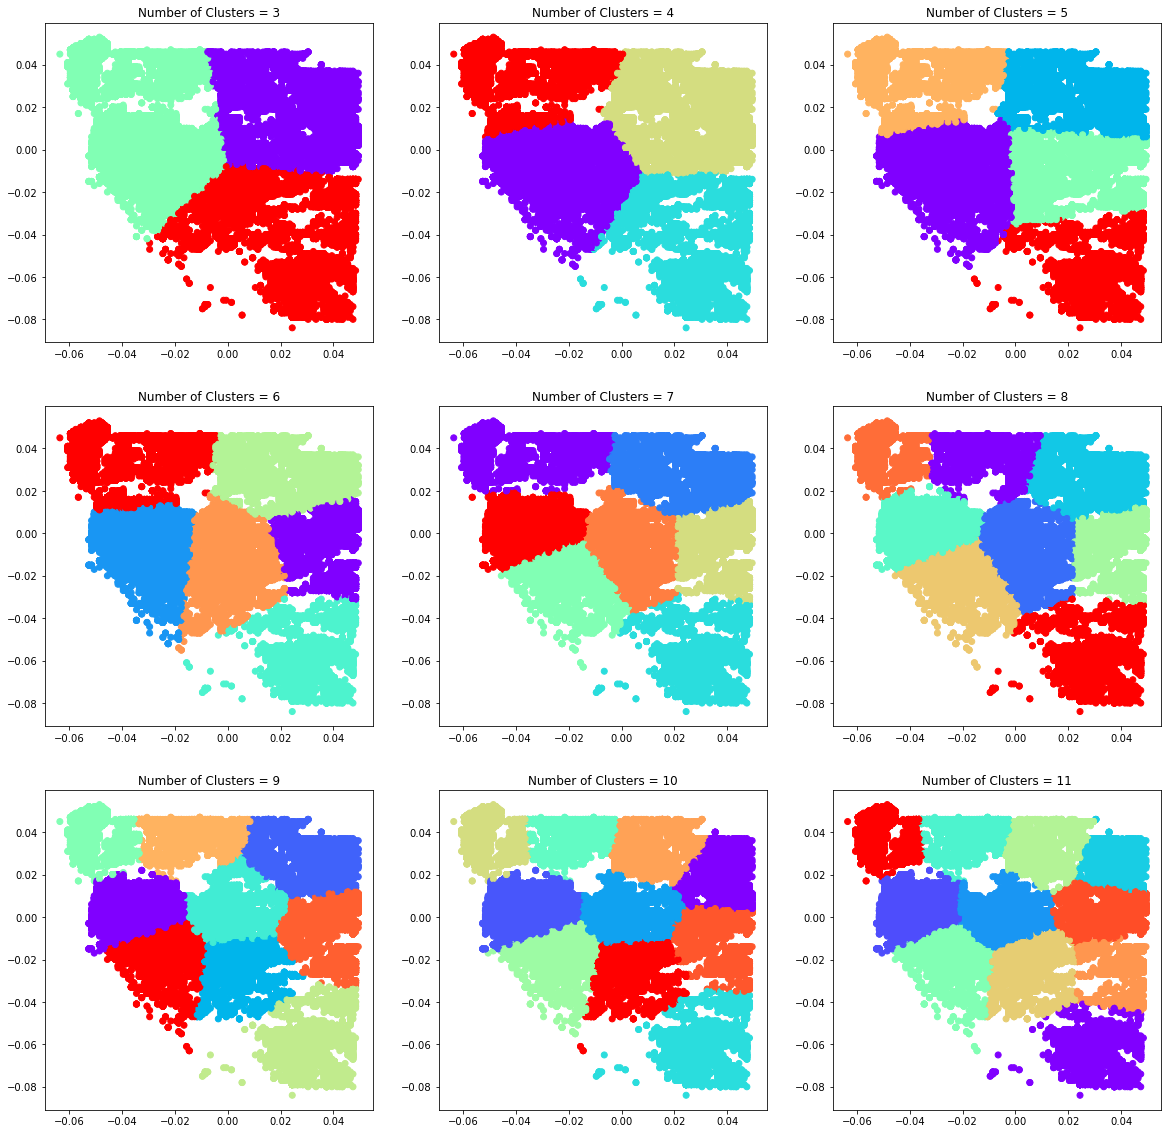

In [162]:
fig=plt.figure(figsize=(20,20))
i=0
for i in range(3,12):
    kmeans_multiple=KMeans(n_clusters=i)
    kmeans_multiple.fit(train)
    fig.add_subplot(3,3,i-2)
    plt.scatter(train['x'],train['y'],c=kmeans_multiple.labels_,cmap='rainbow')
    plt.title("Number of Clusters = {}".format(i))

### Calculating Area of Buffalo

In [163]:
latsin_dist=np.abs(np.sin(np.max(data_geog["lat"])/180*np.pi)-np.sin(np.min(data_geog["lat"])/180*np.pi))
lng_dist=np.abs(np.max(data_geog["long"])-np.min(data_geog["long"]))

Function to calculate area based on Coordinates -

In [164]:
def buffalo_area(latsin,long):
    return 2*np.pi*(6371**2)*latsin*long/360


In [165]:
A=buffalo_area(latsin_dist,lng_dist)
print("The Area of Buffalo is Appoximately {} sq. km".format(A))

The Area of Buffalo is Appoximately 140.2253609151341 sq. km


USA has an average population density of 314 people per square km.
Buffalo population - 886,000

In [166]:
population_buffalo =  886000

Gauging the densities of emergency in the kde we see that the upper right coordinates have more incidents.

Judging from the clusters formed, a cluster >= 7 seems ideal for Buffalo.

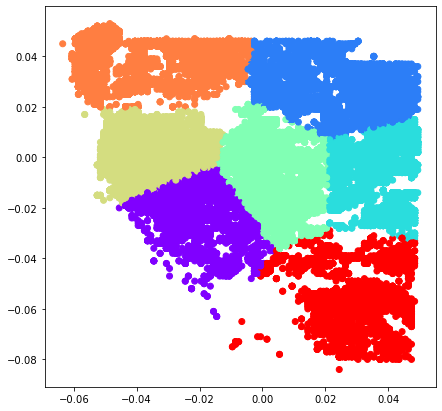

In [171]:
final_kmeans=KMeans(n_clusters=7)
final_kmeans.fit(train)
fig=plt.figure(figsize=(7,7))
plt.scatter(train['x'],train['y'],c=final_kmeans.labels_,cmap='rainbow')

In [172]:
clus_info=pd.DataFrame(final_kmeans.cluster_centers_,columns=['x','y'])
print("Cluster Centers in local coordinate are:")
clus_info

Cluster Centers in local coordinate are:


,x,y
0,-0.022931,-0.022657
1,0.026153,0.026997
2,0.036414,-0.006363
3,0.006050,-0.006484
4,-0.035701,0.002282
5,-0.036355,0.037039
6,0.029612,-0.054081


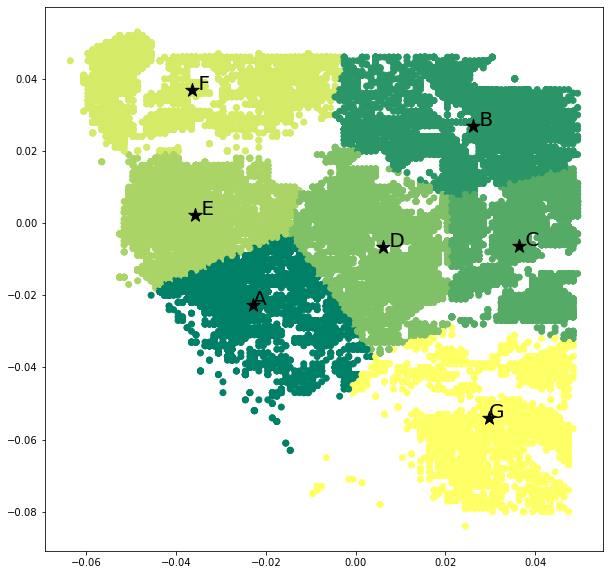

In [185]:
fig=plt.figure(figsize=(10,10))
plt.scatter(train['x'],train['y'],c=final_kmeans.labels_,cmap='summer')
plt.scatter(clus_info['x'],clus_info['y'],marker='*',color='black', s=200)

n=['A',' B',' C',' D',' E',' F','G']
for i,txt in enumerate(n):
    plt.annotate(txt,xy=(clus_info['x'][i],clus_info['y'][i]),color='black', fontsize=20)
plt.show()


### Thus we have the new police dstricts with locations indicated at cluster centres